In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings as fw
fw('ignore')
sns.set_style('whitegrid')

In [79]:
df = pd.read_csv('tour_package.csv').drop('CustomerID',axis=1)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [81]:
100*pd.isnull(df).sum()/len(df)

ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64

In [82]:
# Treatment of Gender Column
df['Gender'] = df['Gender'].apply(lambda x: 'Female' if x.lower() == 'fe male' else x.capitalize())

In [83]:
# Treatment of Occupation Column
df['Occupation'] = df['Occupation'].apply(lambda x: 'Small Business' if x.lower() =='free lancer' else x)

In [84]:
target_col = 'ProdTaken'
cat_cols = ['TypeofContact','CityTier','Occupation','Gender','ProductPitched','MaritalStatus','Passport','OwnCar','Designation']
num_cols = ['DurationOfPitch','NumberOfPersonVisiting','PreferredPropertyStar','NumberOfTrips','PitchSatisfactionScore',
               'NumberOfChildrenVisiting','MonthlyIncome' ]
feats = []

In [85]:
for col in cat_cols:
    print(col)
    print('-'*15)
    print(df[col].value_counts().sort_index(),'\n')
    

TypeofContact
---------------
Company Invited    1419
Self Enquiry       3444
Name: TypeofContact, dtype: int64 

CityTier
---------------
1    3190
2     198
3    1500
Name: CityTier, dtype: int64 

Occupation
---------------
Large Business     434
Salaried          2368
Small Business    2086
Name: Occupation, dtype: int64 

Gender
---------------
Female    1972
Male      2916
Name: Gender, dtype: int64 

ProductPitched
---------------
Basic           1842
Deluxe          1732
King             230
Standard         742
Super Deluxe     342
Name: ProductPitched, dtype: int64 

MaritalStatus
---------------
Divorced      950
Married      2340
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64 

Passport
---------------
0    3466
1    1422
Name: Passport, dtype: int64 

OwnCar
---------------
0    1856
1    3032
Name: OwnCar, dtype: int64 

Designation
---------------
AVP                342
Executive         1842
Manager           1732
Senior Manager     742
VP        

In [86]:
cat_cols

['TypeofContact',
 'CityTier',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Passport',
 'OwnCar',
 'Designation']

In [87]:
# Treating AGE Missing Data
# df.groupby(['MaritalStatus','ProductPitched',])['Age'].mean()
# def imput_col(row, col, dep_col):
#     dep0 = row[dep_col[0]]
#     dep1 = row[dep_col[1]]
#     if pd.isnull(row[col]):
#         return df[col][(df[dep_col[0]]==dep0)&(df[dep_col[1]]==dep1)].mean()
#     return df[col]

def impute_age(row):
    ms = row['MaritalStatus']
    pp = row['ProductPitched']
    if pd.isnull(row['Age']):
        return df['Age'][(df['MaritalStatus']==ms)&(df['ProductPitched']==pp)].mean()
    return row['Age']
df['Age'] = df.apply(impute_age, axis=1)

In [88]:
def impute_duration_pitch(row):
    ms = row['Occupation']
    pp = row['ProductPitched']
    if pd.isnull(row['Age']):
        return df[(df['Occupation']==ms)&(df['ProductPitched']==pp)]['DurationOfPitch'].mean()
    return row['DurationOfPitch']
# df.groupby(['ProductPitched','Occupation'])['DurationOfPitch'].mean()
df['DurationOfPitch'] = df.apply(impute_duration_pitch, axis=1)

In [89]:
def impute_monthly_income(row):
    ms = row['Occupation']
    pp = row['ProductPitched']
    if pd.isnull(row['Age']):
        return df['MonthlyIncome'][(df['Occupation']==ms)&(df['ProductPitched']==pp)].mean()
    return row['MonthlyIncome']
# df.groupby(['ProductPitched','Occupation'])['MonthlyIncome'].mean()
df['MonthlyIncome'] = df.apply(impute_monthly_income, axis=1)

In [90]:
# df.groupby(['MaritalStatus'])['NumberOfTrips'].mean()

In [91]:
df.shape

(4888, 19)

In [92]:
df.dropna(inplace=True)

In [93]:
100*pd.isnull(df).sum()/len(df)

ProdTaken                   0.0
Age                         0.0
TypeofContact               0.0
CityTier                    0.0
DurationOfPitch             0.0
Occupation                  0.0
Gender                      0.0
NumberOfPersonVisiting      0.0
NumberOfFollowups           0.0
ProductPitched              0.0
PreferredPropertyStar       0.0
MaritalStatus               0.0
NumberOfTrips               0.0
Passport                    0.0
PitchSatisfactionScore      0.0
OwnCar                      0.0
NumberOfChildrenVisiting    0.0
Designation                 0.0
MonthlyIncome               0.0
dtype: float64

In [94]:
df.shape

(4224, 19)

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV

In [133]:
features = df.drop(['ProdTaken','Designation','MaritalStatus','Occupation','ProductPitched','OwnCar',
                    'NumberOfPersonVisiting','MonthlyIncome',
                    # 'CityTier','DurationOfPitch','NumberOfTrips',
                    'NumberOfChildrenVisiting','PitchSatisfactionScore'
                    ],axis=1)
target = df['ProdTaken']
features_df = pd.get_dummies(features).drop(['TypeofContact_Company Invited','Gender_Female'],axis=1)

<AxesSubplot:>

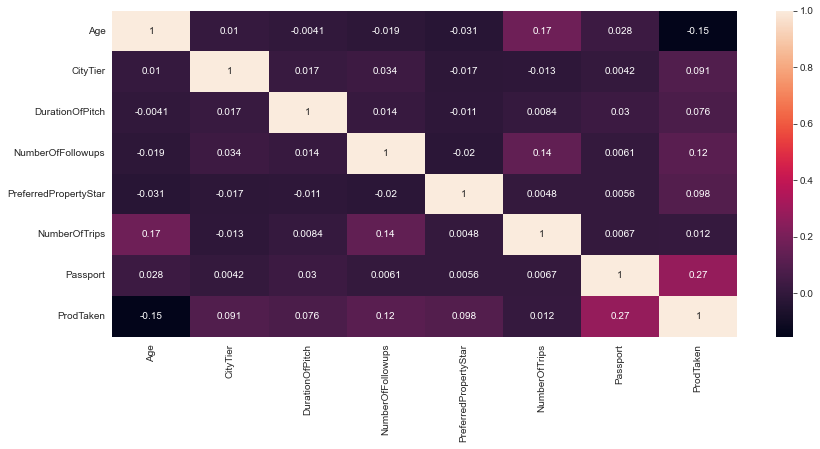

In [138]:
plt.figure(figsize=(14,6))
sns.heatmap(df[list(features.columns)+[target_col]].corr(),annot=True)

In [135]:
xtrain,xtest,ytrain,ytest = train_test_split(features_df, target, test_size=0.25,random_state=101)

model_log = LogisticRegressionCV().fit(xtrain,ytrain)
model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)
model_rf = RandomForestClassifier().fit(xtrain,ytrain)

print('Logistic (Train):', round(model_log.score(xtrain,ytrain)*100,1),'%')
print('Logistic (Test):', round(model_log.score(xtest,ytest)*100,1),'%')

print('DT (Train):', round(model_dt.score(xtrain,ytrain)*100,1),'%')
print('DT (Test):', round(model_dt.score(xtest,ytest)*100,1),'%')

print('RF (Train):', round(model_rf.score(xtrain,ytrain)*100,1),'%')
print('RF (Test):', round(model_rf.score(xtest,ytest)*100,1),'%')


Logistic (Train): 82.8 %
Logistic (Test): 83.0 %
DT (Train): 99.9 %
DT (Test): 89.7 %
RF (Train): 99.9 %
RF (Test): 92.0 %


In [137]:
pd.DataFrame(model_rf.feature_importances_, index=xtrain.columns, columns=['imp']).sort_values(by='imp', ascending=False)

,imp
Age,0.296322
DurationOfPitch,0.219856
NumberOfTrips,0.119232
NumberOfFollowups,0.088081
Passport,0.082951
PreferredPropertyStar,0.059413
Gender_Male,0.049400
CityTier,0.046299
TypeofContact_Self Enquiry,0.038447


In [139]:
pd.to_pickle(model_rf,'TourPackagePredictor.pickle')